In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from hidrocomp.eflow.iha import IHA
from hidrocomp.eflow.graphics import Graphics
import pandas as pd
import plotly as py
from hidrocomp.series.flow import Flow
from simulation import Simulation

In [3]:
file = "../Medicoes/PIMENTAL.csv"
data = pd.read_csv(file, ',', index_col=0, parse_dates=True)
flow = Flow(data=data, source='ONS', station="PIMENTAL")
flow.station = "Natural"
flow.data = flow.data.rename(columns={"PIMENTAL": "Natural"})
month = flow.month_start_year_hydrologic()
date_start = flow.date_start.replace(day=1, month=month[2]) #date_start=01/03/1970
date_end = flow.date_end.replace(day=31, month=month[0]-1) #date_end=31/08/2018
flow.date(date_start=date_start, date_end=date_end) #data range definition

threshold_high=11749.49
threshold_low=1397.0
mxt_flow = 13950 # Maximum turbochargeable flow
simulation = Simulation(data=flow, mxt_flow=mxt_flow)

In [4]:
scenery_90q = simulation.rule_04()

In [5]:
#Remover ano de 2016
date_start_del = pd.to_datetime("01/09/2015", dayfirst=True)
date_end_del = pd.to_datetime("31/08/2016", dayfirst=True)
data_del = pd.date_range(date_start_del, date_end_del, freq='D').values
month_water = flow.month_start_year_hydrologic()[0]
scenery_90q_del = scenery_90q[0].drop(data_del)
data_tvr_scenery_90q = Flow(pd.DataFrame(scenery_90q_del.TVR))
data_natural = Flow(pd.DataFrame(scenery_90q_del.Natural))
scenery_90q_del

TVR  Derivation channel   Natural  e-flow
1970-03-01  1125.0            10023.00  11148.00  1125.0
1970-03-02  1125.0            10584.00  11709.00  1125.0
1970-03-03  1125.0            11349.00  12474.00  1125.0
1970-03-04  1125.0            12227.00  13352.00  1125.0
1970-03-05  1125.0            13007.00  14132.00  1125.0
...            ...                 ...       ...     ...
2018-08-27  1114.0                0.00   1114.00  1125.0
2018-08-28  1125.0                1.26   1126.26  1125.0
2018-08-29  1125.0               37.30   1162.30  1125.0
2018-08-30  1125.0               94.23   1219.23  1125.0
2018-08-31  1125.0                1.99   1126.99  1125.0

[17350 rows x 4 columns]

# Scenery 03: 90Q

In [6]:
iha_sim_scenery_90q = IHA(data_tvr_scenery_90q, month_water=month_water, status='pos', statistic='non-parametric', central_metric='mean',
                          variation_metric='cv',  type_criterion=None, type_threshold="stationary", duration=0,
                          threshold_high=threshold_high, threshold_low=threshold_low, source="ONS", station='TVR - 90Q')

## Magnitude

In [7]:
iha_mag_scenery_90q = iha_sim_scenery_90q.magnitude
iha_mag_scenery_90q.metrics

Coeff. of Var.        Means
January          0.411665  1284.297186
February         0.803229  2329.802879
March            0.702838  5499.351566
April            0.547923  5666.787340
May              0.892610  2981.457164
June             0.215853  1202.059722
July             0.000062  1124.989919
August           0.031817  1113.162184
September        0.138349  1023.615688
October          0.163228  1010.007591
November         0.037248  1107.822638
December         0.020566  1128.385038

## Frequency and Duration

In [8]:
iha_dur_data_scenery_90q = iha_sim_scenery_90q.frequency_and_duration
iha_dur_data_scenery_90q.metrics

Coeff. of Var.       Means
High pulse count           1.977336    0.270833
High pulse duration        0.719504   18.409091
Low pulse count            0.651316    1.224490
Low pulse duration         0.545377  244.772358

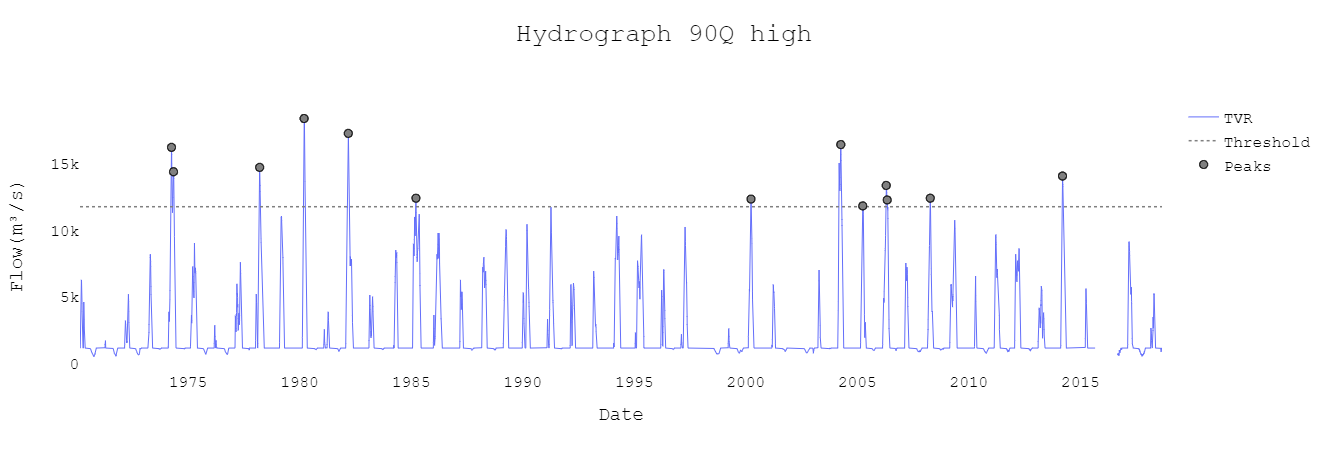

In [9]:
fig_partial_high_scenery_90q, data_fig_partial_high_scenery_90q = iha_dur_data_scenery_90q.events_high.hydrogram(title="Hydrograph 90Q high", color={"Natural": "#002e6f"})

del data_fig_partial_high_scenery_90q[2]
del data_fig_partial_high_scenery_90q[2]

py.offline.iplot(fig_partial_high_scenery_90q)

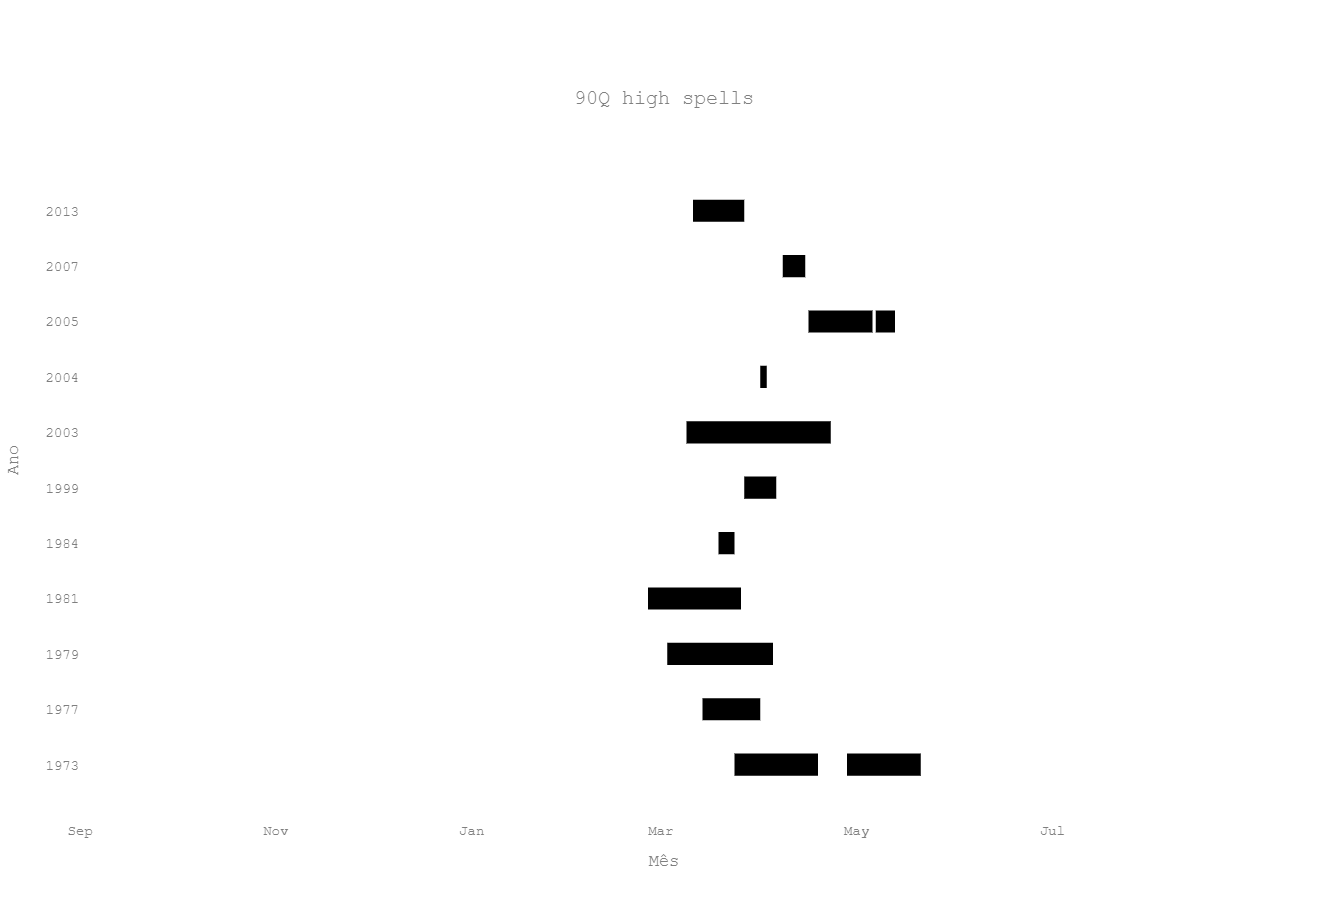

In [10]:
fig_spells_scenery_90q, fig_data_spells_scenery_90q = iha_dur_data_scenery_90q.events_high.plot_spells(title="90Q high spells")
py.offline.iplot(fig_spells_scenery_90q)

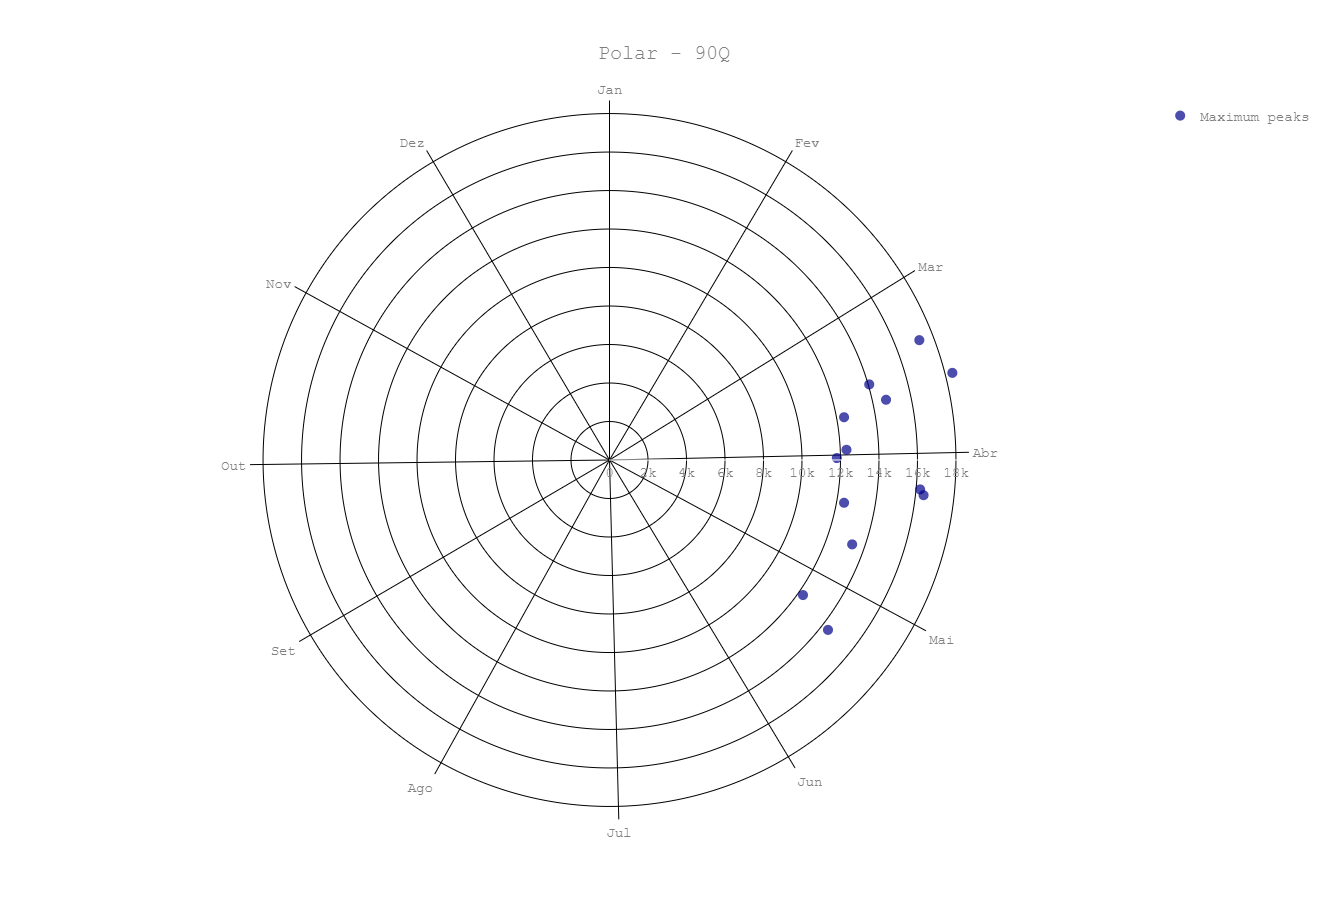

In [11]:
fig_polar_scenery_90q_high, fig_polar_data_scenery_90q_high = iha_dur_data_scenery_90q.events_high.polar(title="Polar - 90Q", color="#00008B")

py.offline.iplot(fig_polar_scenery_90q_high)

## Magnitude e Duration

In [12]:
iha_mag_dur_data_scenery_90q = iha_sim_scenery_90q.magnitude_and_duration
iha_mag_dur_data_scenery_90q.metrics

Coeff. of Var.        Means
1-day minimum              0.213858   934.626250
1-day maximum              0.473461  8785.030625
3-day minimum              0.211049   939.147153
3-day maximum              0.475350  8733.204514
7-day minimum              0.206528   946.486012
7-day maximum              0.478824  8602.634077
30-day minimum             0.184392   976.580938
30-day maximum             0.514699  7451.664708
90-day minimum             0.111297  1042.131356
90-day maximum             0.546099  5040.366481
Number of zero days             NaN     0.000000
Base flow index            0.333860     0.486322

## Timing Extreme

In [13]:
iha_timing_scenery_90q = iha_sim_scenery_90q.timing_extreme
iha_timing_scenery_90q.metrics

Coeff. of Var.       Means
Date of minimum        0.154838  258.729167
Date of maximum        0.403242  101.208333

## Rate and Frequency

In [14]:
iha_rate_freq_scenery_90q = iha_sim_scenery_90q.rate_and_frequency
iha_rate_freq_scenery_90q.metrics

Coeff. of Var.       Means
Rise rate                  0.480469  250.164538
Fall rate                 -0.434804 -204.011516
Number of reversals        0.592191   20.979592

## Polar Natural x 90Q

In [15]:
iha_natural = IHA(data_natural, month_water=month_water, status='pre', statistic='non-parametric', central_metric='mean', 
                                      variation_metric='cv',  type_criterion=None, type_threshold="stationary", duration=0,
                                      threshold_high=threshold_high, threshold_low=threshold_low, source="ONS", station='Natural')

In [16]:
iha_freq_dur_natural = iha_natural.frequency_and_duration
fig_polar_natural_high, fig_polar_data_natural_high = iha_freq_dur_natural.events_high.polar(title="Events High", color="#00008B")

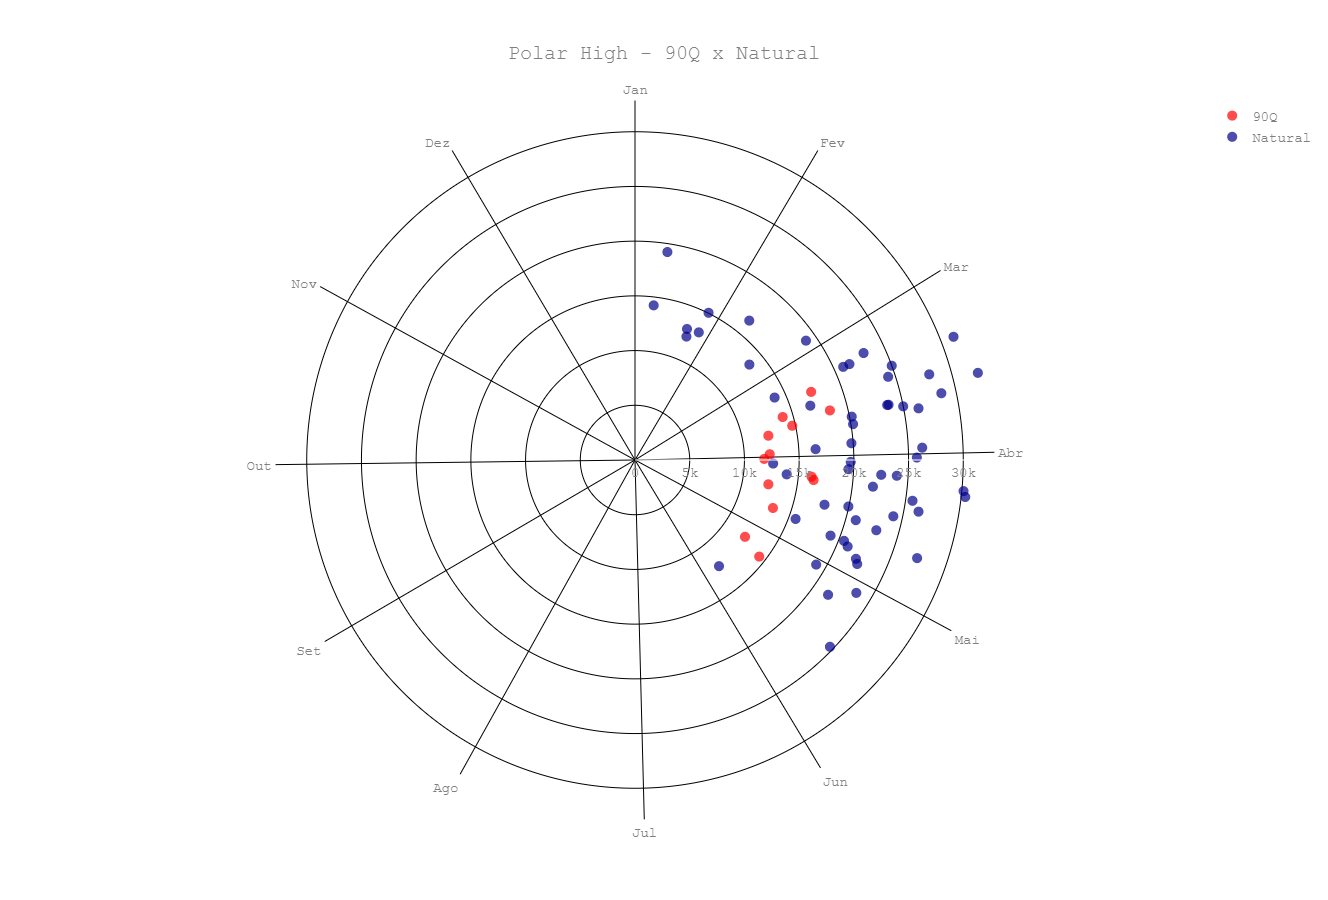

In [17]:
layout=fig_polar_scenery_90q_high['layout']

layout['title']['text'] = "Polar High - 90Q x Natural"
fig_polar_data_scenery_90q_high[0]['marker']['color'] = "red"
fig_polar_data_scenery_90q_high[0]['name'] = "90Q"
fig_polar_data_natural_high[0]['name'] = "Natural"
fig_polar_natural_scenery_90q = dict(data=fig_polar_data_scenery_90q_high+[fig_polar_data_natural_high[0]], layout=layout)

py.offline.iplot(fig_polar_natural_scenery_90q)

# DHRAM - Dundee Hydrologic Regime Assessment Method

In [18]:
dhram = iha_natural.dhram(iha_obs=iha_sim_scenery_90q, m=500, interval=95)
dhram.classification

'21.0 Points - Severely impacted'

In [19]:
dhram.point

Mean Std
Frequency and Duration    3   3
Magnitude                 3   2
Magnitude and Duration    3   2
Rate and Frequency        3   2
Timing Extreme            0   0

## Magnitude

In [20]:
dhram_magnitude = dhram.aspects["Magnitude"]
dhram_magnitude.abnormality

Abnormality_mean Abnormality_std
January           -6.88378        -2.81358
February          -9.07037        -2.52701
March             -9.99678       -0.936123
April             -12.5955       -0.350302
May               -8.42001        -2.05775
June              -7.23576        -3.09182
July              -6.74196        -4.93959
August            -4.02079        -5.25658
September         -1.16751        -2.23873
October           -1.19776        -1.47789
November          -3.42288        -3.45683
December           -5.7602        -2.07004

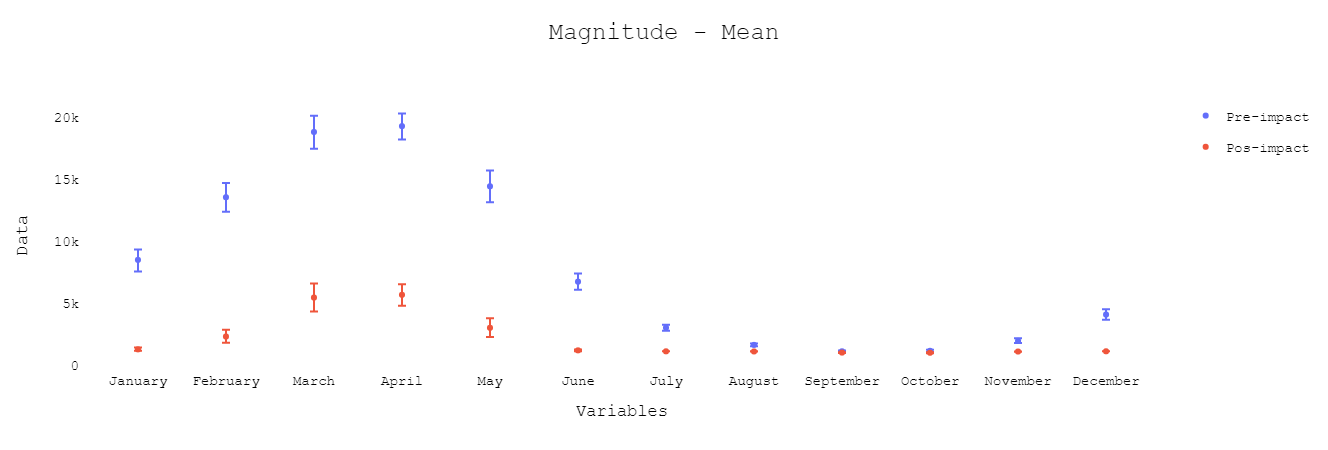

In [21]:
fig_M, data_M = dhram.aspects["Magnitude"].plot(type="mean")
py.offline.iplot(fig_M)

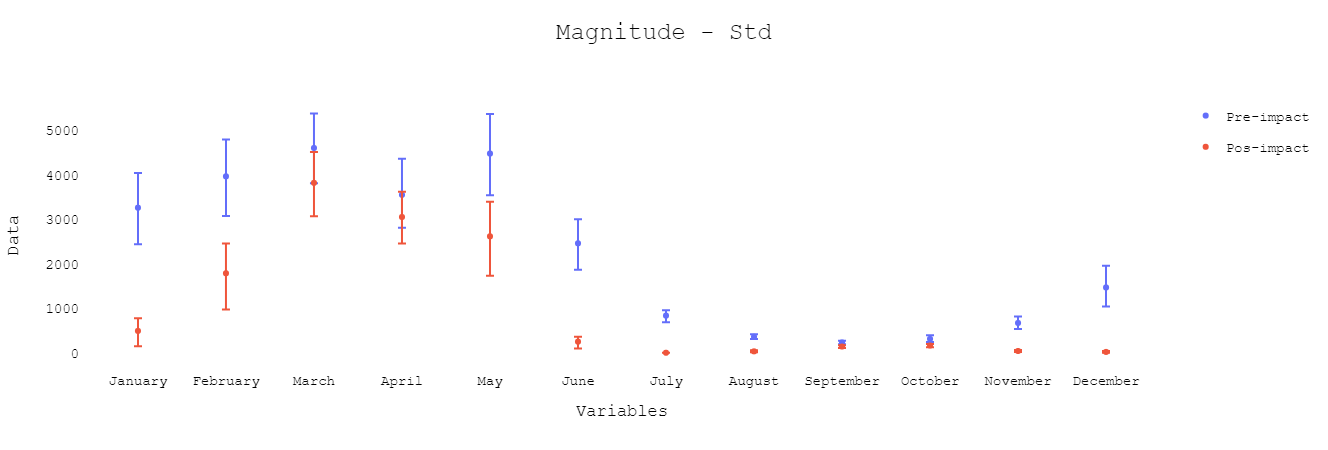

In [22]:
fig_M, data_M = dhram.aspects["Magnitude"].plot(type="std")
py.offline.iplot(fig_M)

## Magnitude and Duration

In [23]:
dhram_magnitude_duration = dhram.aspects["Magnitude and Duration"]
dhram_magnitude_duration.abnormality

Abnormality_mean Abnormality_std
1-day minimum              -0.199656       -0.634847
1-day maximum               -11.9469       -0.032088
3-day minimum              -0.384115       -0.864183
3-day maximum               -12.0914      -0.0627108
7-day minimum              -0.306694       -0.719262
7-day maximum               -10.8764      -0.0783736
30-day minimum              -0.78282        -1.56003
30-day maximum              -11.9439       -0.161556
90-day minimum              -1.85685        -1.28714
90-day maximum              -13.0876       -0.748461
Number of zero days              NaN             NaN
Base flow index              34.0777         16.5665

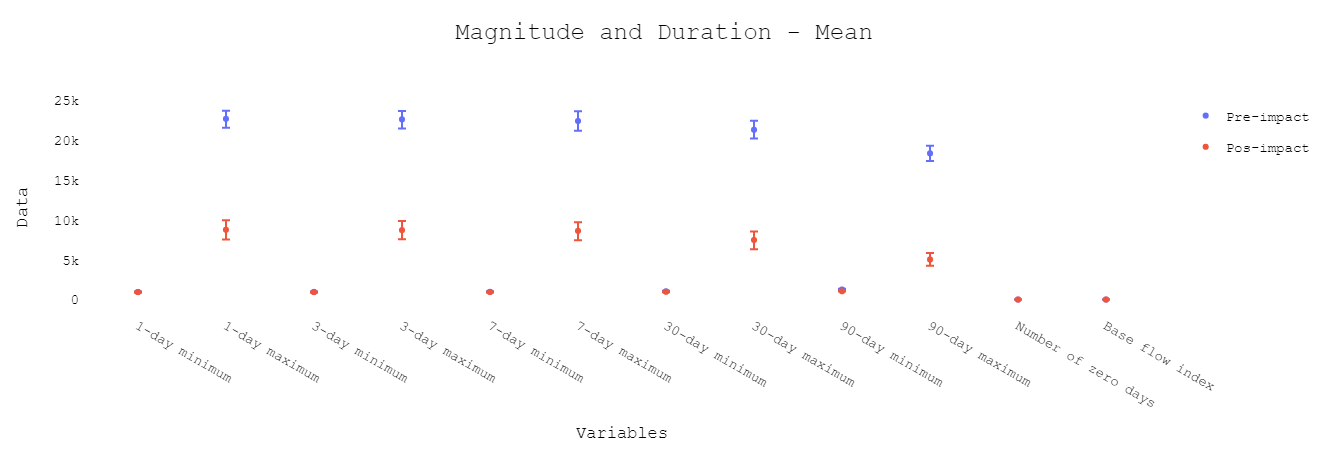

In [24]:
fig_mean_MD, data_mean_MD = dhram.aspects["Magnitude and Duration"].plot(type="mean")
py.offline.iplot(fig_mean_MD)

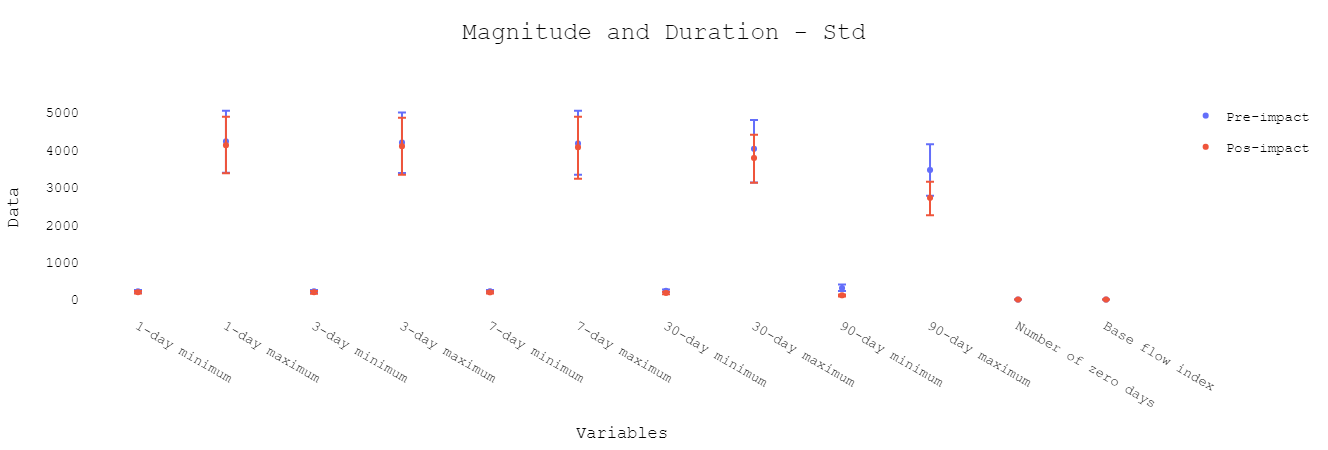

In [25]:
fig_std_MD, data_std_MD = dhram.aspects["Magnitude and Duration"].plot(type="std")
py.offline.iplot(fig_std_MD)

## Timing Extreme

In [26]:
dhram_timing = dhram.aspects["Timing Extreme"]
dhram_timing.abnormality

Abnormality_mean Abnormality_std
Date of minimum        -0.874408        0.363592
Date of maximum         0.669776        0.443335

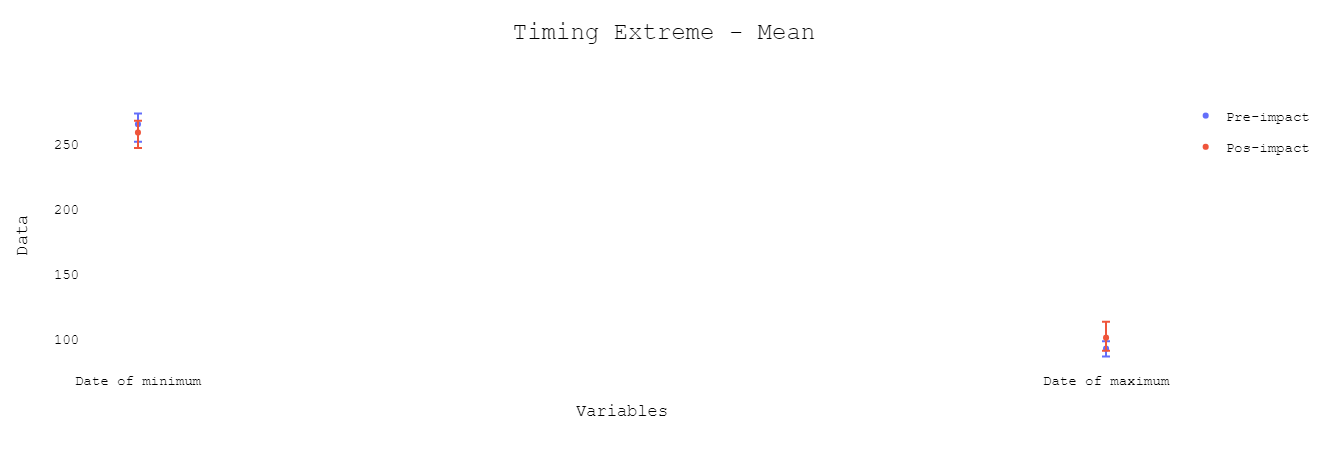

In [27]:
fig_mean_TE, data_mean_TE = dhram.aspects["Timing Extreme"].plot(type="mean")
py.offline.iplot(fig_mean_TE)

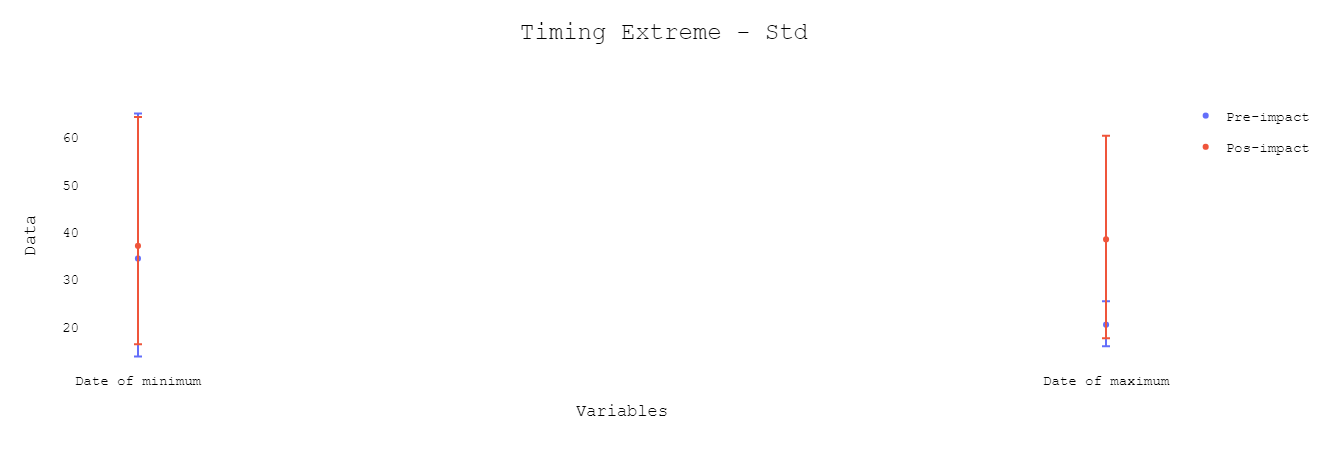

In [28]:
fig_std_TE, data_std_TE = dhram.aspects["Timing Extreme"].plot(type="std")
py.offline.iplot(fig_std_TE)

## Frequency and Duration

In [29]:
dhram_frequency_duration = dhram.aspects["Frequency and Duration"]
dhram_frequency_duration.abnormality

Abnormality_mean Abnormality_std
High pulse count            -6.14471        0.212191
High pulse duration         -8.01573        -3.13721
Low pulse count             -0.66099        0.359495
Low pulse duration           14.7514         9.02482

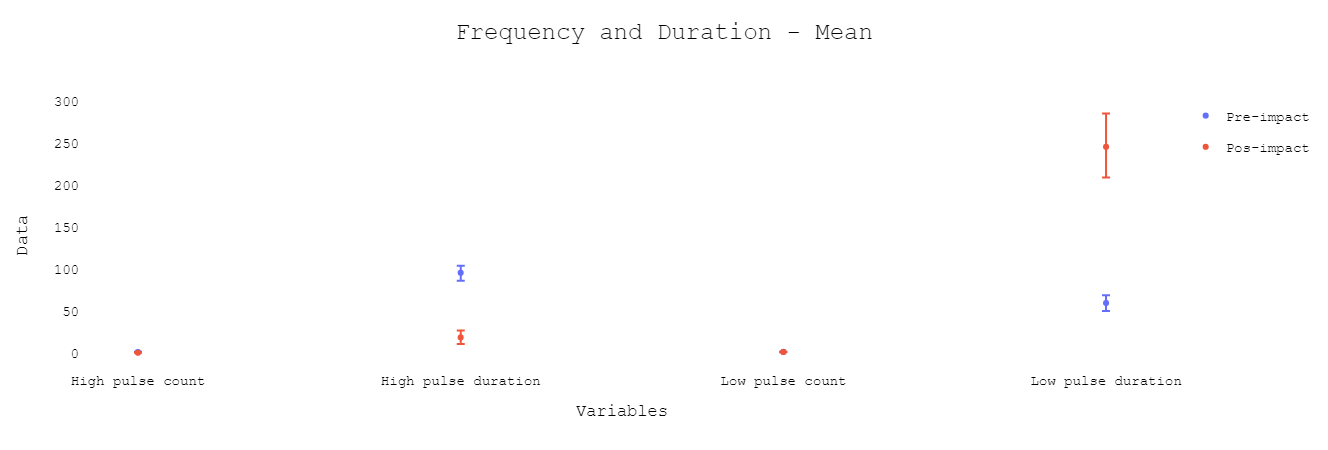

In [30]:
fig_mean_FD, data_mean_FD = dhram.aspects["Frequency and Duration"].plot(type="mean")
py.offline.iplot(fig_mean_FD)

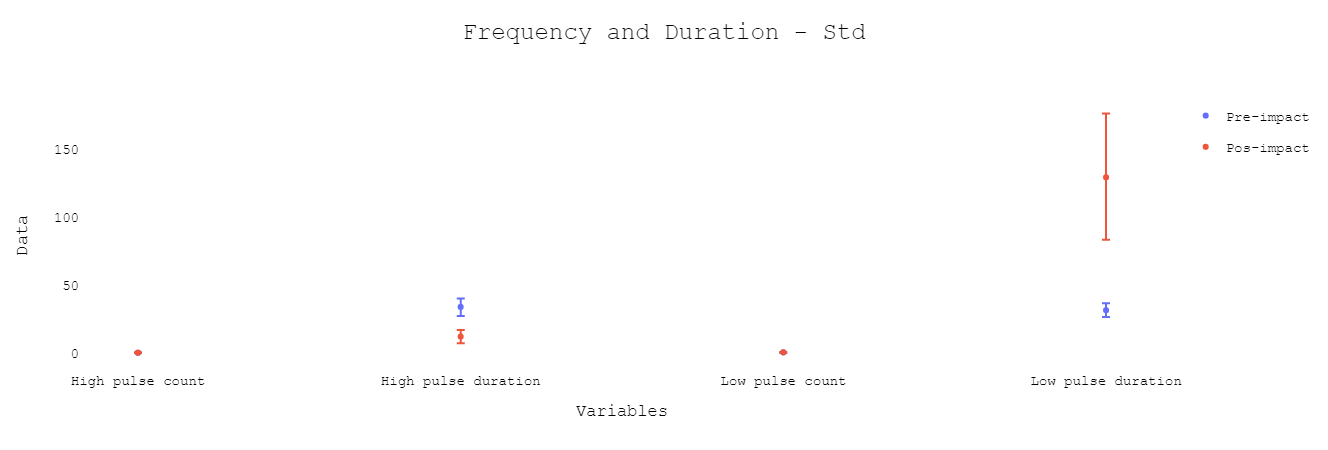

In [31]:
fig_std_FD, data_std_FD = dhram.aspects["Frequency and Duration"].plot(type="std")
py.offline.iplot(fig_std_FD)

## Rate and Frequency

In [32]:
dhram_rate_frequency = dhram.aspects["Rate and Frequency"]
dhram_rate_frequency.abnormality

Abnormality_mean Abnormality_std
Rise rate                  0.0203056        0.147783
Fall rate                   -9.86454         8.20655
Number of reversals           -5.335       -0.402025

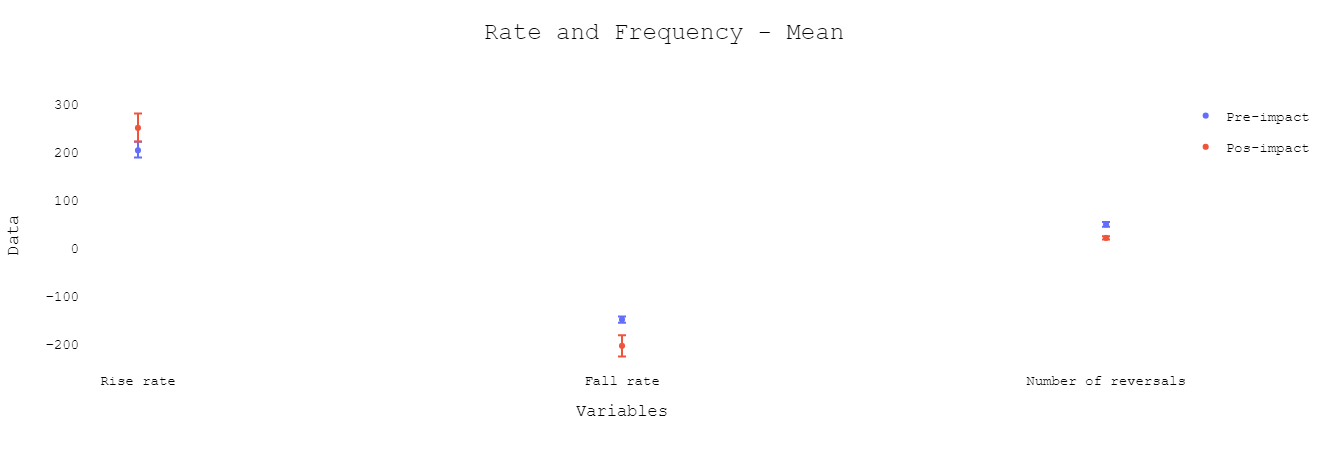

In [33]:
fig_mean_RF, data_mean_RF = dhram.aspects["Rate and Frequency"].plot(type="mean")
py.offline.iplot(fig_mean_RF)

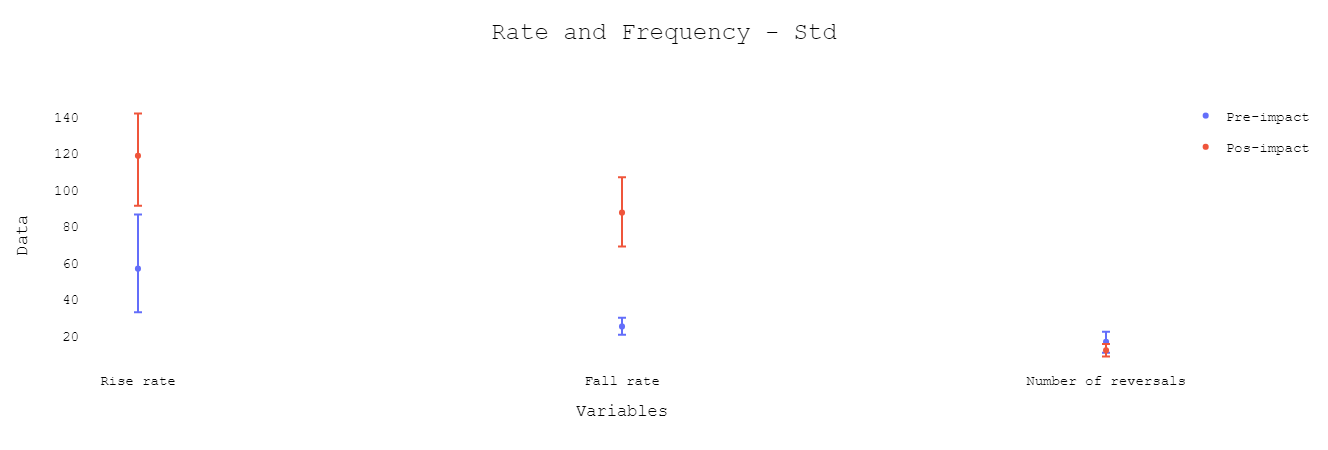

In [34]:
fig_std_RF, data_std_RF = dhram.aspects["Rate and Frequency"].plot(type="std")
py.offline.iplot(fig_std_RF)